## Load the dataset

In [1]:
import pandas as pd
# Load the Glass dataset
glass = pd.read_excel(r"D:\Random Forest\glass.xlsx",sheet_name = 'glass')
glass


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [2]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [3]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [5]:
def remove_outliers(df):
  numerical_columns = df.select_dtypes(include = 'float64')
  for i in numerical_columns:
    Q1  = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + (IQR * 1.5)
    LL = Q1 - (IQR * 1.5)
    df = df[(df[i] >= LL) & (df[i] <= UL)]
  return df

out_data = remove_outliers(glass)
out_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [6]:
import pandas as pd

def remove_outliers(df, columns):

    numerical_columns = [col for col in columns if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        UL = Q3 + (IQR * 1.5)
        LL = Q1 - (IQR * 1.5)

        # Filter rows based on outlier criteria
        df = df[(df[column] >= LL) & (df[column] <= UL)]

    return df

selected_columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba' ]
out_data = remove_outliers(glass, columns=selected_columns)


In [7]:
out_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [8]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## 2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x1500 with 0 Axes>

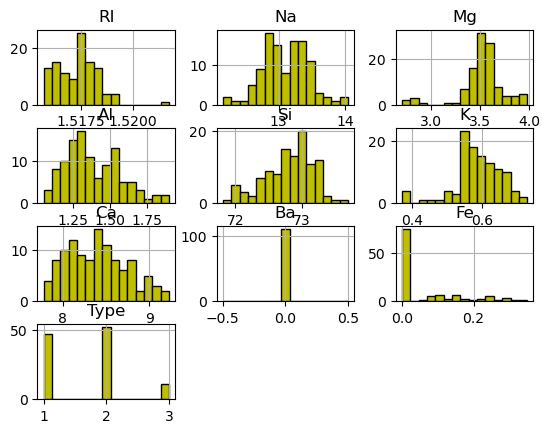

In [10]:
plt.figure(figsize = (15,15))
out_data.hist(bins = 15,color = 'y' , edgecolor = 'k')

<Axes: >

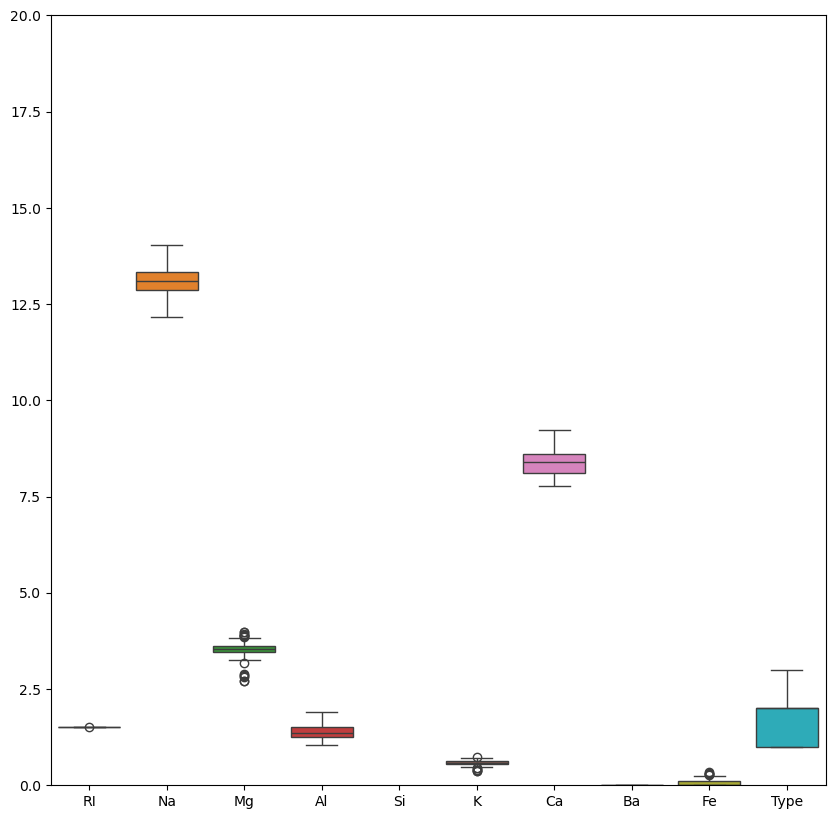

In [11]:
plt.figure(figsize=(10,10))
plt.ylim(0,20)
sns.boxplot(out_data)

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


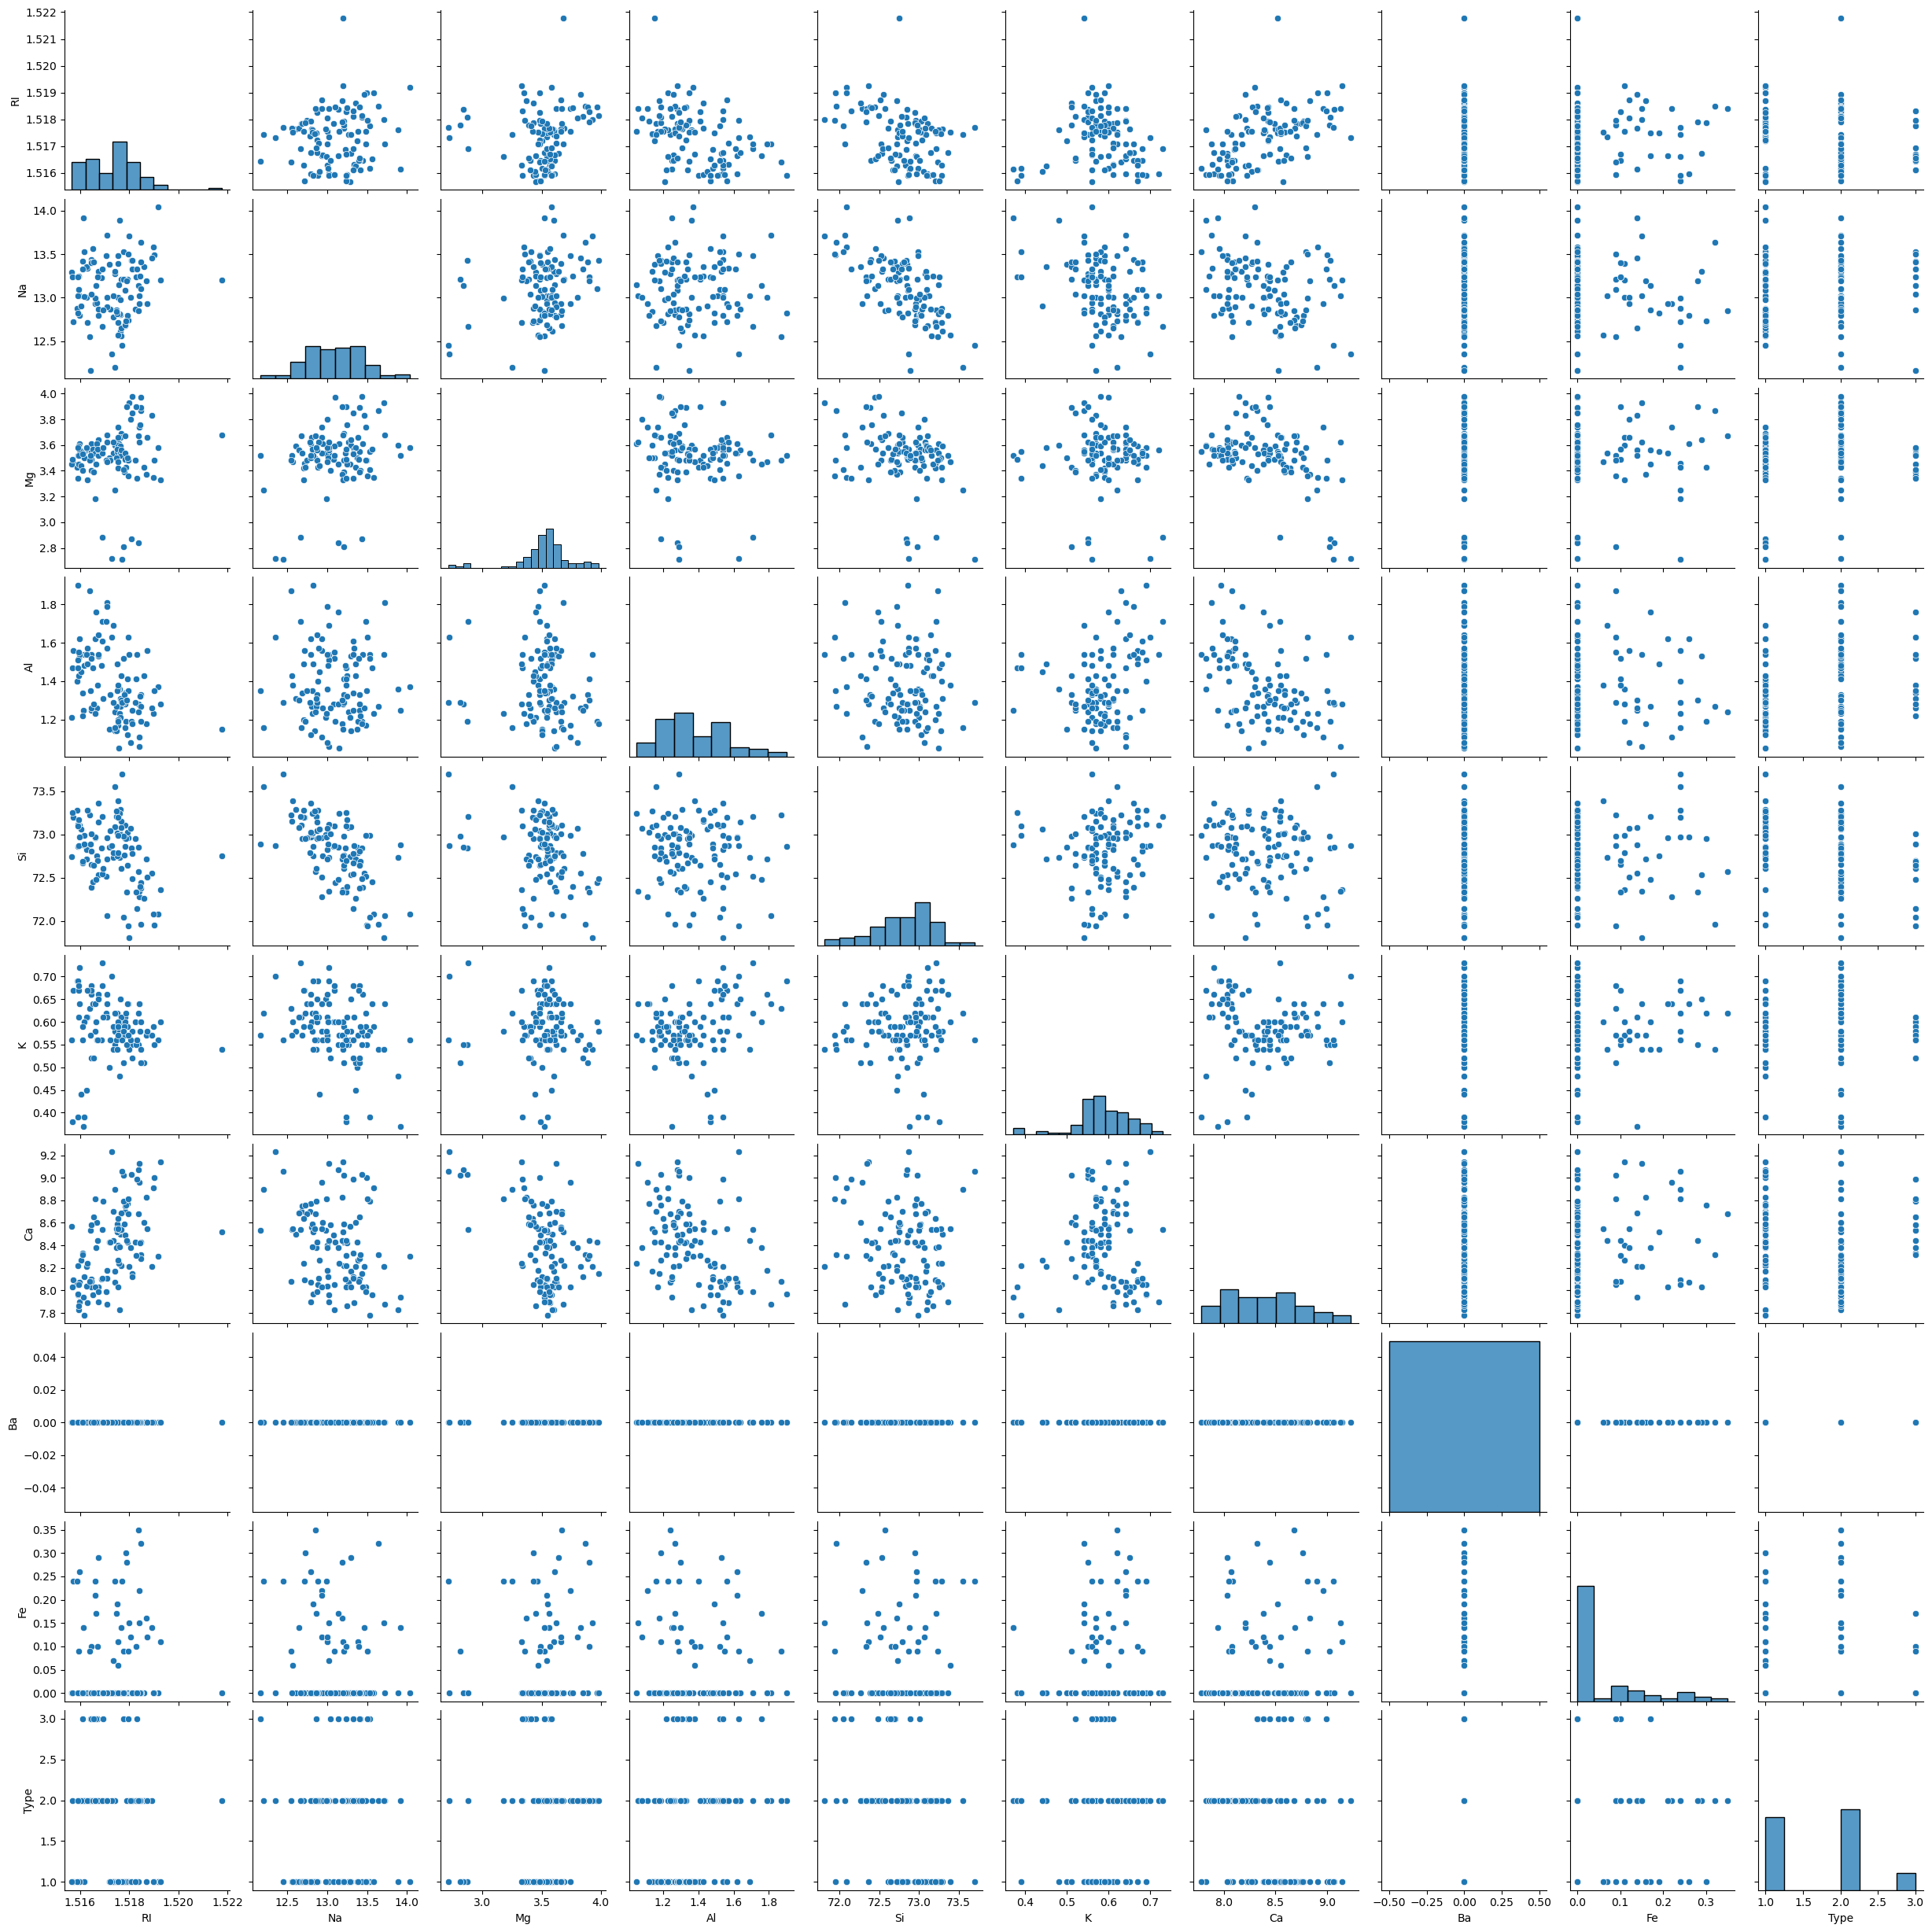

In [12]:
sns.pairplot(out_data)

In [11]:
out_data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.120672,0.135151,-0.434903,-0.402393,-0.115817,0.534660,NaN,0.069416,-0.255043
Na,0.120672,1.000000,0.264117,-0.014359,-0.645799,-0.367180,-0.310972,NaN,-0.141944,0.152502
Mg,0.135151,0.264117,1.000000,-0.114396,-0.324091,-0.066442,-0.469714,NaN,0.045243,0.096997
Al,-0.434903,-0.014359,-0.114396,1.000000,-0.099068,0.269518,-0.427514,NaN,-0.058987,0.322117
Si,-0.402393,-0.645799,-0.324091,-0.099068,1.000000,0.084983,-0.139979,NaN,-0.056008,-0.334517
K,-0.115817,-0.367180,-0.066442,0.269518,0.084983,1.000000,-0.042003,NaN,0.077949,0.036301
Ca,0.534660,-0.310972,-0.469714,-0.427514,-0.139979,-0.042003,1.000000,NaN,0.138130,-0.132904
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.069416,-0.141944,0.045243,-0.058987,-0.056008,0.077949,0.138130,NaN,1.000000,-0.015348
Type,-0.255043,0.152502,0.096997,0.322117,-0.334517,0.036301,-0.132904,NaN,-0.015348,1.000000


<Axes: >

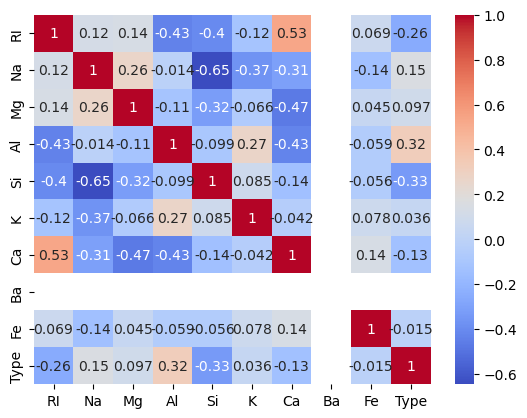

In [12]:
corr_matrix = out_data.corr()
sns.heatmap(corr_matrix,annot = True ,cmap = 'coolwarm')

In [13]:
out_data['Ba'].unique()

array([0.])

## Refractive index(RI) and calcium (Ca) has high correlation compare to others

<Axes: xlabel='RI', ylabel='Ca'>

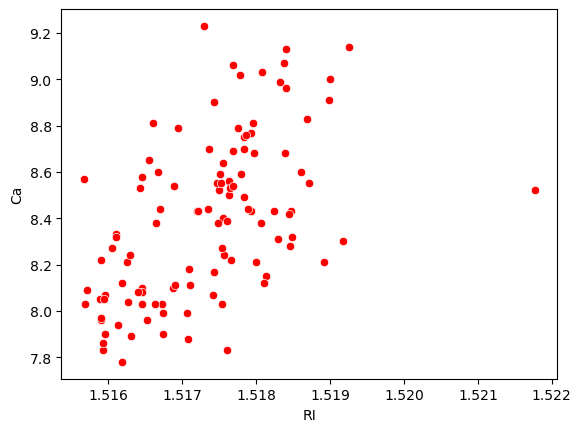

In [14]:
sns.scatterplot(out_data, x = 'RI' , y = 'Ca' , color = 'red' )

## 3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.

2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.

3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.



removal of outliers as done and there is no categorical data in the dataset


In [15]:
out_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [16]:
x = out_data.iloc[:,:-1]
y = out_data.iloc[:,-1]

In [17]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(x)
#scaled_data

array([[ 0.28042826,  2.27571513,  0.36517424, -0.11710623, -0.19338383,
        -1.58706238, -1.63793179,  0.        , -0.61123657],
       [-1.1512941 ,  1.24141788,  0.14275361,  0.86124958,  0.50938334,
        -2.93572483, -1.78232391,  0.        , -0.61123657],
       [ 0.33048849,  0.32204255,  0.76553139, -0.49757793, -0.51773791,
        -0.23839993, -0.51167319,  0.        , -0.61123657],
       [ 0.09019942,  0.49442543,  0.4541425 , -0.76934343,  0.7526489 ,
        -0.53810269, -0.94484958,  0.        , -0.61123657],
       [-1.37155908, -0.88463757,  0.40965837,  1.29607438,  0.45532432,
         0.81055976, -0.94484958,  0.        ,  2.20833856],
       [ 0.10021146,  0.58061686,  0.36517424, -1.31287443,  0.7796784 ,
        -0.08854854, -0.65606532,  0.        , -0.61123657],
       [ 0.23036804,  0.14965968,  0.40965837, -1.80205234,  1.185121  ,
        -0.23839993, -0.45391634,  0.        , -0.61123657],
       [ 1.85231925,  2.70667232,  0.27620599, -0.06275312, -1

## 4: Random Forest Model Implementation

1. Divide the data into train and test split.

2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.

3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.



In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [21]:
y_pred = classifier.predict(x_test)
y_pred

array([2, 1, 2, 2, 1, 1, 3, 1, 2, 1, 3, 3, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1],
      dtype=int64)

<Axes: >

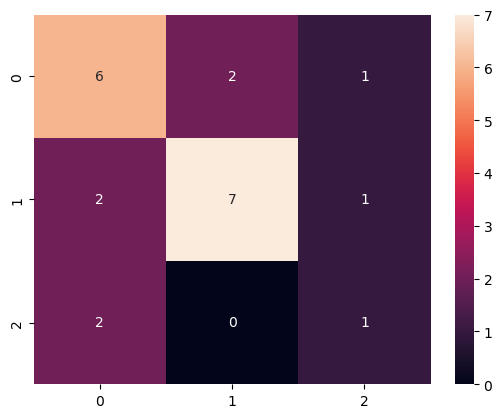

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score , f1_score

acc_score = accuracy_score(y_test,y_pred)
print('accuracy_score : ',acc_score)

prec_score = precision_score(y_test,y_pred , average = 'micro')
print('precision_score : ' , prec_score)

reca_score = recall_score(y_test,y_pred , average = 'micro')
print('recall_score', reca_score)

f_one_score = f1_score(y_test,y_pred , average = 'micro')
print('f1_score : ', f_one_score)

accuracy_score :  0.6363636363636364
precision_score :  0.6363636363636364
recall_score 0.6363636363636364
f1_score :  0.6363636363636364


the probability percentage is 71%

## 5: Bagging and Boosting Methods

Apply the Bagging and Boosting methods and compare the results.



## bagging method

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(x_train, y_train)

y_pred = bagging_clf.predict(x_test)

print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')

Bagging Accuracy: 0.6818181818181818


In [ ]:
## boosting method

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

boosting_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosting_clf.fit(x_train, y_train)

y_pred = bagging_clf.predict(x_test)

print(f'Bagging Accuracy: {accuracy_score(y_test, y_pred)}')

Bagging Accuracy: 0.6818181818181818


## the accuracy is 0.7142... it means the model trains with 71%